/home/user/.local/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.0001. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/home/user/.local/lib/python3.7/site-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


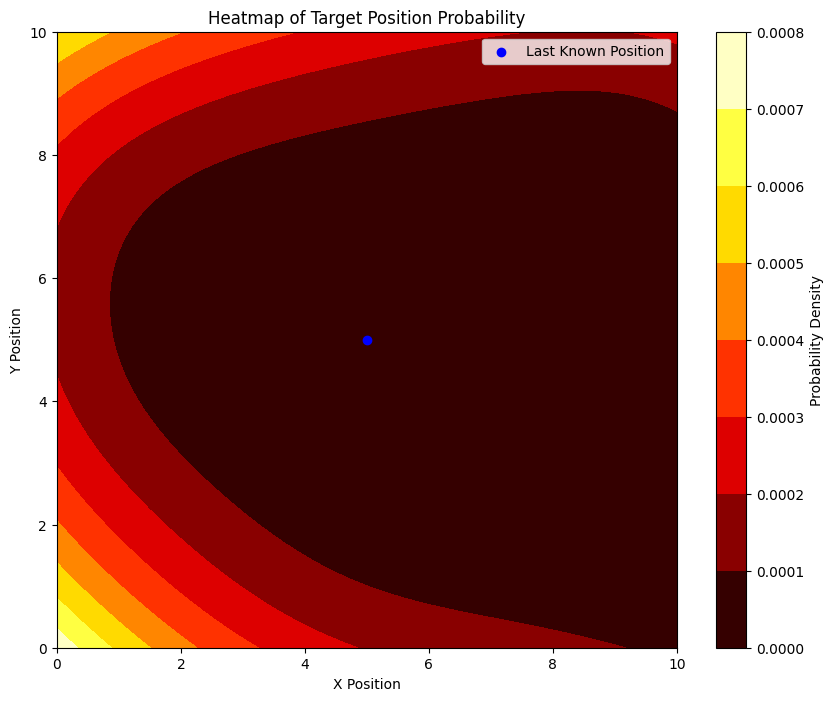

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Last known position
x0, y0 = 5.0, 5.0

# Generate a grid of points where we want to predict the probability
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
xx, yy = np.meshgrid(x, y)
X = np.vstack([xx.ravel(), yy.ravel()]).T

# Define a Gaussian Process model with RBF kernel
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-2, 1e1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Assume some predefined dynamics for the target movement, e.g., random walk
# Here, we simulate a few steps from the last known position
np.random.seed(4)
steps = np.random.randn(100, 2) * 0.5
#positions = np.cumsum(steps, axis=0) + [x0, y0]

# Fit the GP model on these simulated positions
gp.fit(positions, np.zeros(positions.shape[0]))

# Predict the mean and standard deviation of the GP model at each grid point
mu, sigma = gp.predict(X, return_std=True)

# Reshape the results to match the grid
mu = mu.reshape(xx.shape)
sigma = sigma.reshape(xx.shape)

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, sigma, cmap='hot')
plt.colorbar(label='Probability Density')
plt.scatter(x0, y0, c='blue', label='Last Known Position')
plt.title('Heatmap of Target Position Probability')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.show()